# Azure OpenAI Embeddings

## Set up environment

In [1]:
import os
from dotenv import load_dotenv # pip install python-dotenv
from openai import AzureOpenAI # pip install openai

load_dotenv("./../credentials_my.env")
os.environ["AZURE_OPENAI_ENDPOINT"] = os.environ["AZURE_OPENAI_ENDPOINT_04"]
os.environ["AZURE_OPENAI_API_KEY"] = os.environ["AZURE_OPENAI_API_KEY_04"]

chat_model                     = os.environ["GPT-4-32-0613-32k"]
embeddings_model_2_model       = os.environ["TEXT-EMBEDDING-ADA-002"]
embeddings_model_3_small_model = os.environ["TEXT-EMBEDDING-3-SMALL"]
embeddings_model_3_large_model = os.environ["TEXT-EMBEDDING-3-LARGE"]

client = AzureOpenAI(
  api_version = os.getenv("AZURE_OPENAI_API_VERSION")
  # api_key = os.getenv("AZURE_OPENAI_API_KEY"),
  # azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
)

## Test embeddings generation

In [2]:
client.embeddings.create(input = ["Rabbit"], model=embeddings_model_2_model).data[0].embedding[:5]

[-0.016367284581065178,
 -0.008047680370509624,
 -0.019889358431100845,
 -0.011498535051941872,
 -0.021339625120162964]

## Create a helper function

In [3]:
def generate_embeddings(text, model="text-embedding-ada-002"): # model = "deployment_name"
    return client.embeddings.create(input = [text], model=model).data[0].embedding

generate_embeddings("Rabbit")[:5]

[-0.016367284581065178,
 -0.008047680370509624,
 -0.019889358431100845,
 -0.011498535051941872,
 -0.021339625120162964]

# Test different embeddings models

In [4]:
for m in (embeddings_model_2_model, embeddings_model_3_small_model, embeddings_model_3_large_model):
    embeddings = generate_embeddings(text="anatine amigos", model=m)
    print(f"Embeddings in ({m}): {len(embeddings)}. First elements: {[round(embeddings[i],3) for i in [0,1,2,-1]]}")    

Embeddings in (text-embedding-ada-002): 1536. First elements: [-0.027, -0.001, 0.02, -0.023]
Embeddings in (text-embedding-3-small): 1536. First elements: [0.016, -0.026, 0.025, 0.02]
Embeddings in (text-embedding-3-large): 3072. First elements: [-0.06, 0.005, -0.006, 0.007]


# Choose our model

In [5]:
model = embeddings_model_3_small_model

# Calculate Word Embeddings
To use word embeddings for semantic search, you first compute the embeddings for a corpus of text using a word embedding algorithm. What does this mean? We are going to create a numerical representation of each of these words. To perform this computation, we'll use OpenAI's 'get_embedding' function.

Since we have our words in a pandas dataframe, we can use "apply" to apply the get_embedding function to each row in the dataframe. We then store the calculated word embeddings in a new text file called "word_embeddings.csv" so that we don't have to call OpenAI again to perform these calculations.

# Learn how to generate embeddings with Azure OpenAI
https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/embeddings?tabs=console

In [6]:
import numpy as np
embeddings = generate_embeddings("rabbit")
print(f"embeddings shape: {np.array(embeddings).shape}. Now showing the first 5 elements:\n{embeddings[:5]}")

embeddings shape: (1536,). Now showing the first 5 elements:
[-0.006842212751507759, -0.022518673911690712, -0.018874114379286766, -0.008764960803091526, -0.01746063306927681]


# Cosine similarity
https://en.wikipedia.org/wiki/Cosine_similarity
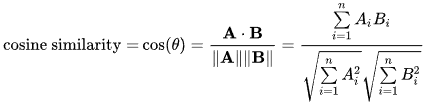

In [7]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
numerator = np.dot(v1,v2) # 4+10+18
print(numerator)

32


In [8]:
denominator_1 = np.linalg.norm(v1) # sqrt (1+4+9) = 3.74
denominator_2 = np.linalg.norm(v2) # sqrt (16+25+36) = 8.77
denominator   = denominator_1 * denominator_2
print(denominator)

32.83291031876401


In [9]:
print(numerator / denominator)

0.9746318461970762


In [11]:
def cosine_similarity(v1,v2):
    numerator = np.dot(v1,v2)
    denumerator = np.linalg.norm(v1) * np.linalg.norm(v2)
    return numerator / denumerator

cs = cosine_similarity(np.array([1,2,3]),np.array([4,5,6]))
print(cs)

0.9746318461970762


In [12]:
cs = cosine_similarity(np.array([1,2,3,-1,2,3,-1,2,3,-1,2,3]),np.array([-4,5,6,4,5,-6,4,5,-6,4,5,6]))
print(cs)

0.1827434711619518


## Create an embedding for a single word

In [13]:
#openai.Embedding.create(input="rabbit", engine=azure_openai_deployment_emb)['data'][0]['embedding']
generate_embeddings("rabbit")

[-0.006842212751507759,
 -0.022518673911690712,
 -0.018874114379286766,
 -0.008764960803091526,
 -0.01746063306927681,
 0.009956718422472477,
 -0.006000360939651728,
 -0.03176172450184822,
 -0.023793578147888184,
 -0.014439667575061321,
 0.019830292090773582,
 0.009443986229598522,
 0.009409341961145401,
 -0.0233639907091856,
 -0.0021340774837881327,
 -0.005917214788496494,
 0.03084711916744709,
 -0.0003518542798701674,
 0.018583104014396667,
 0.002196436980739236,
 0.004631918389350176,
 -0.007787996903061867,
 -0.019275985658168793,
 -0.027950871735811234,
 -0.01790407858788967,
 -0.006603168323636055,
 0.017419060692191124,
 -0.0035787371452897787,
 -0.006623954977840185,
 -0.013594350777566433,
 0.005477234721183777,
 -0.0015607173554599285,
 -0.026468103751540184,
 -0.03137370944023132,
 -0.01518797967582941,
 -0.013823001645505428,
 0.02400144375860691,
 -0.009298480115830898,
 0.014120941050350666,
 0.012471881695091724,
 0.02272653952240944,
 0.01791793666779995,
 -0.0007703985

## Check distance between two words

In [17]:
v1 = generate_embeddings("rabbit")
v2 = generate_embeddings("dog") # dog, elephant, car, space shuttle

cs = cosine_similarity(v1,v2)
print(cs)

0.860260017548913


# Read Data File Containing Words
Now that we have configured OpenAI, let's start with a simple CSV file with familiar words

In [18]:
import pandas as pd
file_name = 'words'
df = pd.read_csv(f'{file_name}.csv')
print(df)

            text
0            red
1       potatoes
2           soda
3         cheese
4          water
5           blue
6         crispy
7      hamburger
8         coffee
9          green
10          milk
11      la croix
12        yellow
13     chocolate
14  french fries
15         latte
16          cake
17         brown
18  cheeseburger
19      espresso
20    cheesecake
21         black
22         mocha
23         fizzy
24        carbon
25        banana


In [19]:
try:    
    #df["text_embeddings"] = df["text"].apply(lambda x: openai.Embedding.create(input=x, engine=azure_openai_deployment_emb)['data'][0]['embedding'])
    df["text_embeddings"] = df["text"].apply(lambda x: generate_embeddings(x))
    df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float  
except:
    #print('switching to pickle file...')
    df = pd.read_pickle(f"{file_name}_enriched.pkl")

df

,text,text_embeddings
0,red,"[1.8579006791696884e-05, -0.024676261469721794..."
1,potatoes,"[0.005025846417993307, -0.031079445034265518, ..."
2,soda,"[0.025859491899609566, -0.0074522839859128, -0..."
3,cheese,"[-0.003942061681300402, -0.009351087734103203,..."
4,water,"[0.019031280651688576, -0.01257743313908577, 0..."
5,blue,"[0.005434895399957895, -0.0072994716465473175,..."
6,crispy,"[-0.0010056837927550077, -0.005415474995970726..."
7,hamburger,"[-0.013206875883042812, -0.0018223668448626995..."
8,coffee,"[-0.0007566262502223253, -0.01945229433476925,..."
9,green,"[0.01538460049778223, -0.010931522585451603, 0..."


In [20]:
search_term = input ('Insert a search term:\n') # "hot dog", "torta"...

#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = generate_embeddings(search_term)
df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df

Insert a search term:
 hot dog


,text,text_embeddings,similarity
0,red,"[1.8579006791696884e-05, -0.024676261469721794...",0.812070
1,potatoes,"[0.005025846417993307, -0.031079445034265518, ...",0.816856
2,soda,"[0.025859491899609566, -0.0074522839859128, -0...",0.820797
3,cheese,"[-0.003942061681300402, -0.009351087734103203,...",0.824127
4,water,"[0.019031280651688576, -0.01257743313908577, 0...",0.798268
5,blue,"[0.005434895399957895, -0.0072994716465473175,...",0.786934
6,crispy,"[-0.0010056837927550077, -0.005415474995970726...",0.820502
7,hamburger,"[-0.013206875883042812, -0.0018223668448626995...",0.876765
8,coffee,"[-0.0007566262502223253, -0.01945229433476925,...",0.799683
9,green,"[0.01538460049778223, -0.010931522585451603, 0...",0.785477


In [23]:
df.sort_values("similarity", ascending=False)

,text,text_embeddings,similarity
16,cake,"[-0.013669420965015888, -0.016827935352921486,...",0.888280
20,cheesecake,"[0.011245746165513992, -0.012743037194013596, ...",0.863541
15,latte,"[-0.015634099021553993, -0.003942839801311493,...",0.819430
14,french fries,"[0.0014476682990789413, -0.016491735354065895,...",0.818772
3,cheese,"[-0.003942061681300402, -0.009351087734103203,...",0.816725
13,chocolate,"[0.0015591585543006659, -0.013005273416638374,...",0.813195
7,hamburger,"[-0.013206875883042812, -0.0018223668448626995...",0.806830
22,mocha,"[-0.012487593106925488, -0.026140518486499786,...",0.805919
25,banana,"[-0.013975119218230247, -0.03290277719497681, ...",0.801455
18,cheeseburger,"[-0.018216602504253387, 0.005054355598986149, ...",0.801360


In [22]:
search_term = "gateau"
#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = generate_embeddings(search_term)

df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df = df.sort_values("similarity", ascending=False)
df

,text,text_embeddings,similarity
16,cake,"[-0.013669420965015888, -0.016827935352921486,...",0.888280
20,cheesecake,"[0.011245746165513992, -0.012743037194013596, ...",0.863541
15,latte,"[-0.015634099021553993, -0.003942839801311493,...",0.819430
14,french fries,"[0.0014476682990789413, -0.016491735354065895,...",0.818772
3,cheese,"[-0.003942061681300402, -0.009351087734103203,...",0.816725
13,chocolate,"[0.0015591585543006659, -0.013005273416638374,...",0.813195
7,hamburger,"[-0.013206875883042812, -0.0018223668448626995...",0.806830
22,mocha,"[-0.012487593106925488, -0.026140518486499786,...",0.805919
25,banana,"[-0.013975119218230247, -0.03290277719497681, ...",0.801455
18,cheeseburger,"[-0.018216602504253387, 0.005054355598986149, ...",0.801360


# Campaign Speeches

In [ ]:
file_name = 'discorso_presidente_del_consiglio'

df = pd.read_csv(f'{file_name}.csv')

df

In [ ]:
try:
    df["text_embeddings"] = df["text"].apply(lambda x: 
       # openai.Embedding.create(input=x, engine=azure_openai_deployment_emb)['data'][0]['embedding'])
       generate_embeddings(x))
    df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float
    df.to_csv(f"{file_name}_enriched.csv") # type(df['embeddings'][0][0]) --> string

except:
    print("switching to pickle file...")
    df = pd.read_pickle(f"{file_name}_enriched.pkl")
    
df

In [ ]:
# accoglienza profughi extracomunitari --> flussi migratori, traffico di essere umani, immigrazione
# a quali gruppi appartiene l'Italia?
search_term = input ('Insert a search term:\n')

#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = model.embed_query(search_term)

df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df.sort_values("similarity", ascending=False).head(5)

## Generalize top paragraphs identification

In [ ]:
def top_paragraphs_identification (search_term, top_terms=5):
    # search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
    search_term_vector = model.embed_query(search_term)
    df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
    return df.sort_values("similarity", ascending=False).head(top_terms)


# possible questions:
# "A quali gruppi appartiene l'Italia?"
# "Che cosa hanno fatto le Forze Armate?"
# "Quali sono le donne italiane che hanno dimostrato valore?"
# "Quali sono le grandi sfide dell'Unione Europea?"
# "Quale strada vuole perseguire il governo?"

question = "Quali sono le donne italiane che hanno dimostrato valore?"
best_paragraphs_df = top_paragraphs_identification(question)
best_paragraph_nr = best_paragraphs_df.index[0]
best_paragraph_text = best_paragraphs_df["text"][best_paragraph_nr]
print(f"The best answer should be in paragraph #{best_paragraph_nr}:\n{best_paragraph_text}")